## Data Collection and EDA

In this notebook I have imported various historical data which was collected from publicly available data from the Federal Reserve Economic Date(FRED) published by  Federal Reserve Bank of St.Louis. The data collected from individual source was then combined into a single dataframe which was used for preliminary EDA and then exported as CSV file for future use for model creationa and evaluation

In [5]:
#Library imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score

pd.pandas.set_option('display.max_colwidth', None)
pd.pandas.set_option('display.max_row', None)

#### Data Import

In [6]:
mr_30_yr = pd.read_csv('../Data/MORTGAGE30US.csv') ## weekly

In [7]:
fed_int_rt = pd.read_csv('../Data/FEDFUNDS.csv') ## monthly
us_tr_10yr = pd.read_csv('../Data/us_treasury_securities_10yr.csv')## monthly
inf_exp = pd.read_csv('../Data/inflation_expectation.csv') ## monthly
unemp = pd.read_csv('../Data/Unemployment_rt.csv') ## monthly
rec_ind = pd.read_csv('../Data/UsResc_indicator.csv') ## monthly

csushpisa = pd.read_csv('../Data/case_shiller_national_home_price_index.csv') #monthly Case-Shiller U.S. National Home Price Index
hs_afford_index = pd.read_csv('../Data/MSACSR.csv')# monthly Housing affordability index
ttl_cons_spend = pd.read_csv('../Data/total_cosnturction_spending.csv')# monthly total construction spending



In [8]:
gdp_per = pd.read_csv('../Data/GDP_Per_Capita_1948-2024.csv')## quaterly
ownsp_rate_vac = pd.read_csv('../Data/home_ownerhip_rate_vacant_unit.csv')# quarterly home ownership rt:vacant housing unit
ownsp_rate_toal_hs = pd.read_csv('../Data/homeownership_rate_total_housing_unit.csv')# quarterly home ownership rt:total housing unit
med_hs_sp = pd.read_csv('../Data/median_sale_price_housesold.csv')#quarterly  Medaian sales price of houses sold


In [9]:
mr_30_yr.shape

(2775, 2)

In [10]:
mr_30_yr.head(3)

DATE  MORTGAGE30US
0  1971-04-02          7.33
1  1971-04-09          7.31
2  1971-04-16          7.31

In [11]:
mr_30_yr.tail(3)

DATE  MORTGAGE30US
2772  2024-05-16          7.02
2773  2024-05-23          6.94
2774  2024-05-30          7.03

In [12]:
fed_int_rt.head(2)

DATE  FEDFUNDS
0  1954-07-01      0.80
1  1954-08-01      1.22

In [13]:
fed_int_rt.tail(2)

DATE  FEDFUNDS
837  2024-04-01      5.33
838  2024-05-01      5.33

In [14]:
us_tr_10yr.head(2)

DATE  GS10
0  1953-04-01  2.83
1  1953-05-01  3.05

In [15]:
us_tr_10yr.tail(2)

DATE  GS10
852  2024-04-01  4.54
853  2024-05-01  4.48

In [16]:
inf_exp.head(2)

DATE  MICH
0  1978-01-01   5.2
1  1978-02-01   6.4

In [17]:
inf_exp.tail(2)

DATE  MICH
554  2024-03-01   2.9
555  2024-04-01   3.2

In [18]:
unemp.head(2)

DATE  UNRATE
0  1948-01-01     3.4
1  1948-02-01     3.8

In [19]:
unemp.tail(2)

DATE  UNRATE
914  2024-03-01     3.8
915  2024-04-01     3.9

In [20]:
rec_ind.head(2)

DATE  USREC
0  1854-12-01      1
1  1855-01-01      0

In [21]:
rec_ind.tail(2)

DATE  USREC
2032  2024-04-01      0
2033  2024-05-01      0

In [22]:
csushpisa.head(2)

DATE  CSUSHPISA
0  1987-01-01     63.965
1  1987-02-01     64.425

In [23]:
csushpisa.tail(2)

DATE  CSUSHPISA
445  2024-02-01    317.194
446  2024-03-01    318.144

In [24]:
hs_afford_index.head(2)

DATE  MSACSR
0  1963-01-01     4.7
1  1963-02-01     6.6

In [25]:
hs_afford_index.tail(2)

DATE  MSACSR
734  2024-03-01     8.5
735  2024-04-01     9.1

In [26]:
ttl_cons_spend.head(2)

DATE  TLRESCONS
0  2002-01-01   382979.0
1  2002-02-01   391434.0

In [27]:
ttl_cons_spend.tail(2)

DATE  TLRESCONS
266  2024-03-01   901438.0
267  2024-04-01   902292.0

In [28]:
gdp_per.head(2)

DATE  A939RX0Q048SBEA
0  1948-01-01          15371.0
1  1948-04-01          15563.0

In [29]:
gdp_per.tail(2)

DATE  A939RX0Q048SBEA
303  2023-10-01          67513.0
304  2024-01-01          67702.0

In [30]:
ownsp_rate_vac.head(2)

DATE  EVACANTUSQ176N
0  2000-04-01         13773.0
1  2000-07-01         13586.0

In [31]:
ownsp_rate_vac.tail(2)

DATE  EVACANTUSQ176N
94  2023-10-01         14761.0
95  2024-01-01         15283.0

In [32]:
ownsp_rate_toal_hs.head()

DATE  ETOTALUSQ176N
0  2000-04-01       116047.0
1  2000-07-01       116482.0
2  2000-10-01       116914.0
3  2001-01-01       117347.0
4  2001-04-01       117786.0

In [33]:
ownsp_rate_toal_hs.tail()

DATE  ETOTALUSQ176N
91  2023-01-01       144740.0
92  2023-04-01       145149.0
93  2023-07-01       145558.0
94  2023-10-01       145967.0
95  2024-01-01       146375.0

In [34]:
med_hs_sp.head()

DATE    MSPUS
0  1963-01-01  17800.0
1  1963-04-01  18000.0
2  1963-07-01  17900.0
3  1963-10-01  18500.0
4  1964-01-01  18500.0

In [35]:
med_hs_sp.tail()

DATE     MSPUS
240  2023-01-01  429000.0
241  2023-04-01  418500.0
242  2023-07-01  435400.0
243  2023-10-01  423200.0
244  2024-01-01  420800.0

### Checking for null values

In [36]:
#check for null values

print(mr_30_yr.isnull().sum())
print(fed_int_rt.isnull().sum())
print(us_tr_10yr.isnull().sum())
print(inf_exp.isnull().sum())
print(unemp.isnull().sum())
print(rec_ind.isnull().sum())
print(gdp_per.isnull().sum())


print(csushpisa.isnull().sum())
print(hs_afford_index.isnull().sum())
print(ttl_cons_spend.isnull().sum())
print(ownsp_rate_vac.isnull().sum())
print(ownsp_rate_toal_hs.isnull().sum())
print(med_hs_sp.isnull().sum())

DATE            0
MORTGAGE30US    0
dtype: int64
DATE        0
FEDFUNDS    0
dtype: int64
DATE    0
GS10    0
dtype: int64
DATE    0
MICH    0
dtype: int64
DATE      0
UNRATE    0
dtype: int64
DATE     0
USREC    0
dtype: int64
DATE               0
A939RX0Q048SBEA    0
dtype: int64
DATE         0
CSUSHPISA    0
dtype: int64
DATE      0
MSACSR    0
dtype: int64
DATE         0
TLRESCONS    0
dtype: int64
DATE              0
EVACANTUSQ176N    0
dtype: int64
DATE             0
ETOTALUSQ176N    0
dtype: int64
DATE     0
MSPUS    0
dtype: int64


### The DATE column in all the dataframe being converted to DatetimeFormat

In [37]:
# Convert the 'DATE' columns to datetime format
mr_30_yr['DATE'] = pd.to_datetime(mr_30_yr['DATE'])
fed_int_rt['DATE'] = pd.to_datetime(fed_int_rt['DATE'])
us_tr_10yr['DATE'] = pd.to_datetime(us_tr_10yr['DATE'])
inf_exp['DATE'] = pd.to_datetime(inf_exp['DATE'])
unemp['DATE'] = pd.to_datetime(unemp['DATE'])
rec_ind['DATE'] = pd.to_datetime(rec_ind['DATE'])
gdp_per['DATE'] = pd.to_datetime(gdp_per['DATE'])


csushpisa['DATE'] = pd.to_datetime(csushpisa['DATE'])
hs_afford_index['DATE'] = pd.to_datetime(hs_afford_index['DATE'])
ttl_cons_spend['DATE'] = pd.to_datetime(ttl_cons_spend['DATE'])
ownsp_rate_vac['DATE'] = pd.to_datetime(ownsp_rate_vac['DATE'])
ownsp_rate_toal_hs['ownsp_rate_toal_hs'] = pd.to_datetime(ownsp_rate_toal_hs['DATE'])
med_hs_sp['DATE'] = pd.to_datetime(med_hs_sp['DATE'])

In [38]:
# Extract year and month from the 'DATE' columns
mr_30_yr['YEAR_MONTH'] = mr_30_yr['DATE'].dt.to_period('M')
fed_int_rt['YEAR_MONTH'] = fed_int_rt['DATE'].dt.to_period('M')
us_tr_10yr['YEAR_MONTH'] = us_tr_10yr['DATE'].dt.to_period('M')
inf_exp['YEAR_MONTH'] = inf_exp['DATE'].dt.to_period('M')

unemp['YEAR_MONTH'] = unemp['DATE'].dt.to_period('M')
rec_ind['YEAR_MONTH'] = rec_ind['DATE'].dt.to_period('M')

csushpisa['YEAR_MONTH'] = csushpisa['DATE'].dt.to_period('M')
hs_afford_index['YEAR_MONTH'] = hs_afford_index['DATE'].dt.to_period('M')
ttl_cons_spend['YEAR_MONTH'] = ttl_cons_spend['DATE'].dt.to_period('M')



### Merging all the individual data frames

In [39]:
# Merge the datasets on the 'YEAR_MONTH' column using a left join
mr_30_yr_fed = pd.merge(mr_30_yr, fed_int_rt[['YEAR_MONTH', 'FEDFUNDS']], on='YEAR_MONTH', how='left')


In [40]:
mr_30_yr_fed.head(2)

DATE  MORTGAGE30US YEAR_MONTH  FEDFUNDS
0 1971-04-02          7.33    1971-04      4.16
1 1971-04-09          7.31    1971-04      4.16

In [41]:
# Merge the datasets on the 'YEAR_MONTH' column using a left join
mr_30_yr_fed_tr = pd.merge(mr_30_yr_fed, us_tr_10yr[['YEAR_MONTH', 'GS10']], on='YEAR_MONTH', how='left')

In [42]:
# Merge the datasets on the 'YEAR_MONTH' column using a left join
mr_30_yr_fed_tr_inf = pd.merge(mr_30_yr_fed_tr, inf_exp[['YEAR_MONTH', 'MICH']], on='YEAR_MONTH', how='left')

In [43]:
# Merge the datasets on the 'YEAR_MONTH' column using a left join
mr_30_yr_fed_tr_inf_unrt = pd.merge(mr_30_yr_fed_tr_inf, unemp[['YEAR_MONTH', 'UNRATE']], on='YEAR_MONTH', how='left')

In [44]:
# Merge the datasets on the 'YEAR_MONTH' column using a left join
mr_30_yr_fed_tr_inf_unrt_rec = pd.merge(mr_30_yr_fed_tr_inf_unrt, rec_ind[['YEAR_MONTH', 'USREC']], on='YEAR_MONTH', how='left')

In [45]:
# Merge the datasets on the 'YEAR_MONTH' column using a left join
mr_30_yr_fed_tr_inf_unrt_rec = pd.merge(mr_30_yr_fed_tr_inf_unrt, rec_ind[['YEAR_MONTH', 'USREC']], on='YEAR_MONTH', how='left')

In [46]:
# Merge the datasets on the 'YEAR_MONTH' column using a left join
mr_30_yr_fed_hpi = pd.merge(mr_30_yr_fed_tr_inf_unrt_rec, csushpisa[['YEAR_MONTH', 'CSUSHPISA']], on='YEAR_MONTH', how='left')

In [47]:
# Merge the datasets on the 'YEAR_MONTH' column using a left join
mr_30_yr_fed_haffi = pd.merge(mr_30_yr_fed_hpi, hs_afford_index[['YEAR_MONTH', 'MSACSR']], on='YEAR_MONTH', how='left')

In [48]:
# Merge the datasets on the 'YEAR_MONTH' column using a left join
mr_30_yr_fed_haffi = pd.merge(mr_30_yr_fed_hpi, hs_afford_index[['YEAR_MONTH', 'MSACSR']], on='YEAR_MONTH', how='left')

In [49]:
mr_30_yr_fed_haffi.head()

DATE  MORTGAGE30US YEAR_MONTH  FEDFUNDS  GS10  MICH  UNRATE  USREC  \
0 1971-04-02          7.33    1971-04      4.16  5.83   NaN     5.9      0   
1 1971-04-09          7.31    1971-04      4.16  5.83   NaN     5.9      0   
2 1971-04-16          7.31    1971-04      4.16  5.83   NaN     5.9      0   
3 1971-04-23          7.31    1971-04      4.16  5.83   NaN     5.9      0   
4 1971-04-30          7.29    1971-04      4.16  5.83   NaN     5.9      0   

   CSUSHPISA  MSACSR  
0        NaN     4.2  
1        NaN     4.2  
2        NaN     4.2  
3        NaN     4.2  
4        NaN     4.2

In [50]:
# drop the 'YEAR_MONTH' column from final dataframe
mortgage_df = mr_30_yr_fed_haffi.drop(columns=['YEAR_MONTH'])


### Analysing the final DataFrame and merging additional quarterly datas

In [51]:
mortgage_df.head(10)

DATE  MORTGAGE30US  FEDFUNDS  GS10  MICH  UNRATE  USREC  CSUSHPISA  \
0 1971-04-02          7.33      4.16  5.83   NaN     5.9      0        NaN   
1 1971-04-09          7.31      4.16  5.83   NaN     5.9      0        NaN   
2 1971-04-16          7.31      4.16  5.83   NaN     5.9      0        NaN   
3 1971-04-23          7.31      4.16  5.83   NaN     5.9      0        NaN   
4 1971-04-30          7.29      4.16  5.83   NaN     5.9      0        NaN   
5 1971-05-07          7.38      4.63  6.39   NaN     5.9      0        NaN   
6 1971-05-14          7.42      4.63  6.39   NaN     5.9      0        NaN   
7 1971-05-21          7.44      4.63  6.39   NaN     5.9      0        NaN   
8 1971-05-28          7.46      4.63  6.39   NaN     5.9      0        NaN   
9 1971-06-04          7.52      4.91  6.52   NaN     5.9      0        NaN   

   MSACSR  
0     4.2  
1     4.2  
2     4.2  
3     4.2  
4     4.2  
5     4.6  
6     4.6  
7     4.6  
8     4.6  
9     4.7

In [52]:
# Create a new column in weekly_data for the quarter start date
mortgage_df['quarter_start'] = mortgage_df['DATE'].dt.to_period('Q').dt.start_time


In [53]:
mortgage_df.head(3)

DATE  MORTGAGE30US  FEDFUNDS  GS10  MICH  UNRATE  USREC  CSUSHPISA  \
0 1971-04-02          7.33      4.16  5.83   NaN     5.9      0        NaN   
1 1971-04-09          7.31      4.16  5.83   NaN     5.9      0        NaN   
2 1971-04-16          7.31      4.16  5.83   NaN     5.9      0        NaN   

   MSACSR quarter_start  
0     4.2    1971-04-01  
1     4.2    1971-04-01  
2     4.2    1971-04-01

In [54]:
# Merge the datasets on the 'QUARTER_START' column using a left join
mortgage_df_final = pd.merge(mortgage_df, gdp_per[['DATE', 'A939RX0Q048SBEA']], 
                         left_on='quarter_start', right_on='DATE', how='left')


In [55]:
mortgage_df_final.head()

DATE_x  MORTGAGE30US  FEDFUNDS  GS10  MICH  UNRATE  USREC  CSUSHPISA  \
0 1971-04-02          7.33      4.16  5.83   NaN     5.9      0        NaN   
1 1971-04-09          7.31      4.16  5.83   NaN     5.9      0        NaN   
2 1971-04-16          7.31      4.16  5.83   NaN     5.9      0        NaN   
3 1971-04-23          7.31      4.16  5.83   NaN     5.9      0        NaN   
4 1971-04-30          7.29      4.16  5.83   NaN     5.9      0        NaN   

   MSACSR quarter_start     DATE_y  A939RX0Q048SBEA  
0     4.2    1971-04-01 1971-04-01          26394.0  
1     4.2    1971-04-01 1971-04-01          26394.0  
2     4.2    1971-04-01 1971-04-01          26394.0  
3     4.2    1971-04-01 1971-04-01          26394.0  
4     4.2    1971-04-01 1971-04-01          26394.0

In [56]:

# drop the 'quarter_start' and extra 'date' columns 
mortgage_df_final = mortgage_df_final.drop(columns=['quarter_start', 'DATE_y'])


In [57]:
mortgage_df_final= mortgage_df_final.rename(columns={'DATE_x': 'DATE','A939RX0Q048SBEA' :'GDP'})

In [58]:
mortgage_df_final.head()

DATE  MORTGAGE30US  FEDFUNDS  GS10  MICH  UNRATE  USREC  CSUSHPISA  \
0 1971-04-02          7.33      4.16  5.83   NaN     5.9      0        NaN   
1 1971-04-09          7.31      4.16  5.83   NaN     5.9      0        NaN   
2 1971-04-16          7.31      4.16  5.83   NaN     5.9      0        NaN   
3 1971-04-23          7.31      4.16  5.83   NaN     5.9      0        NaN   
4 1971-04-30          7.29      4.16  5.83   NaN     5.9      0        NaN   

   MSACSR      GDP  
0     4.2  26394.0  
1     4.2  26394.0  
2     4.2  26394.0  
3     4.2  26394.0  
4     4.2  26394.0

In [59]:
mortgage_df_final.shape

(2775, 10)

In [60]:
mortgage_df_final.isnull().sum()

DATE              0
MORTGAGE30US      0
FEDFUNDS          0
GS10              0
MICH            358
UNRATE            5
USREC             0
CSUSHPISA       831
MSACSR            5
GDP               9
dtype: int64

In [61]:
mortgage_df_final[mortgage_df_final['MICH'].isnull()]

DATE  MORTGAGE30US  FEDFUNDS  GS10  MICH  UNRATE  USREC  CSUSHPISA  \
0    1971-04-02          7.33      4.16  5.83   NaN     5.9      0        NaN   
1    1971-04-09          7.31      4.16  5.83   NaN     5.9      0        NaN   
2    1971-04-16          7.31      4.16  5.83   NaN     5.9      0        NaN   
3    1971-04-23          7.31      4.16  5.83   NaN     5.9      0        NaN   
4    1971-04-30          7.29      4.16  5.83   NaN     5.9      0        NaN   
5    1971-05-07          7.38      4.63  6.39   NaN     5.9      0        NaN   
6    1971-05-14          7.42      4.63  6.39   NaN     5.9      0        NaN   
7    1971-05-21          7.44      4.63  6.39   NaN     5.9      0        NaN   
8    1971-05-28          7.46      4.63  6.39   NaN     5.9      0        NaN   
9    1971-06-04          7.52      4.91  6.52   NaN     5.9      0        NaN   
10   1971-06-11          7.52      4.91  6.52   NaN     5.9      0        NaN   
11   1971-06-18          7.54      4.91  6.52   NaN     5.9      0        NaN   
12   1971-06-25          7.54      4.91  6.52   NaN     5.9      0        NaN   
13   1971-07-02          7.54      5.31  6.73   NaN     6.0      0        NaN   
14   1971-07-09          7.54      5.31  6.73   NaN     6.0      0        NaN   
15   1971-07-16          7.60      5.31  6.73   NaN     6.0      0        NaN   
16   1971-07-23          7.65      5.31  6.73   NaN     6.0      0        NaN   
17   1971-07-30          7.69      5.31  6.73   NaN     6.0      0        NaN   
18   1971-08-06          7.66      5.57  6.58   NaN     6.1      0        NaN   
19   1971-08-13          7.73      5.57  6.58   NaN     6.1      0        NaN   
20   1971-08-20          7.71      5.57  6.58   NaN     6.1      0        NaN   
21   1971-08-27          7.69      5.57  6.58   NaN     6.1      0        NaN   
22   1971-09-03          7.71      5.55  6.14   NaN     6.0      0        NaN   
23   1971-09-10          7.67      5.55  6.14   NaN     6.0      0        NaN   
24   1971-09-17          7.70      5.55  6.14   NaN     6.0      0        NaN   
25   1971-09-24          7.67      5.55  6.14   NaN     6.0      0        NaN   
26   1971-10-01          7.67      5.20  5.93   NaN     5.8      0        NaN   
27   1971-10-08          7.63      5.20  5.93   NaN     5.8      0        NaN   
28   1971-10-15          7.63      5.20  5.93   NaN     5.8      0        NaN   
29   1971-10-22          7.58      5.20  5.93   NaN     5.8      0        NaN   
30   1971-10-29          7.63      5.20  5.93   NaN     5.8      0        NaN   
31   1971-11-05          7.59      4.91  5.81   NaN     6.0      0        NaN   
32   1971-11-12          7.56      4.91  5.81   NaN     6.0      0        NaN   
33   1971-11-19          7.54      4.91  5.81   NaN     6.0      0        NaN   
34   1971-11-26          7.51      4.91  5.81   NaN     6.0      0        NaN   
35   1971-12-03          7.49      4.14  5.93   NaN     6.0      0        NaN   
36   1971-12-10          7.47      4.14  5.93   NaN     6.0      0        NaN   
37   1971-12-17          7.48      4.14  5.93   NaN     6.0      0        NaN   
38   1971-12-24          7.48      4.14  5.93   NaN     6.0      0        NaN   
39   1971-12-31          7.48      4.14  5.93   NaN     6.0      0        NaN   
40   1972-01-07          7.46      3.51  5.95   NaN     5.8      0        NaN   
41   1972-01-14          7.46      3.51  5.95   NaN     5.8      0        NaN   
42   1972-01-21          7.43      3.51  5.95   NaN     5.8      0        NaN   
43   1972-01-28          7.40      3.51  5.95   NaN     5.8      0        NaN   
44   1972-02-04          7.35      3.30  6.08   NaN     5.7      0        NaN   
45   1972-02-11          7.33      3.30  6.08   NaN     5.7      0        NaN   
46   1972-02-18          7.31      3.30  6.08   NaN     5.7      0        NaN   
47   1972-02-25          7.31      3.30  6.08   NaN     5.7      0        NaN   
48   1972-03-03          7.32      3.83  6

In [62]:
mortgage_df_final[mortgage_df_final['CSUSHPISA'].isnull()]

DATE  MORTGAGE30US  FEDFUNDS   GS10  MICH  UNRATE  USREC  \
0    1971-04-02          7.33      4.16   5.83   NaN     5.9      0   
1    1971-04-09          7.31      4.16   5.83   NaN     5.9      0   
2    1971-04-16          7.31      4.16   5.83   NaN     5.9      0   
3    1971-04-23          7.31      4.16   5.83   NaN     5.9      0   
4    1971-04-30          7.29      4.16   5.83   NaN     5.9      0   
5    1971-05-07          7.38      4.63   6.39   NaN     5.9      0   
6    1971-05-14          7.42      4.63   6.39   NaN     5.9      0   
7    1971-05-21          7.44      4.63   6.39   NaN     5.9      0   
8    1971-05-28          7.46      4.63   6.39   NaN     5.9      0   
9    1971-06-04          7.52      4.91   6.52   NaN     5.9      0   
10   1971-06-11          7.52      4.91   6.52   NaN     5.9      0   
11   1971-06-18          7.54      4.91   6.52   NaN     5.9      0   
12   1971-06-25          7.54      4.91   6.52   NaN     5.9      0   
13   1971-07-02          7.54      5.31   6.73   NaN     6.0      0   
14   1971-07-09          7.54      5.31   6.73   NaN     6.0      0   
15   1971-07-16          7.60      5.31   6.73   NaN     6.0      0   
16   1971-07-23          7.65      5.31   6.73   NaN     6.0      0   
17   1971-07-30          7.69      5.31   6.73   NaN     6.0      0   
18   1971-08-06          7.66      5.57   6.58   NaN     6.1      0   
19   1971-08-13          7.73      5.57   6.58   NaN     6.1      0   
20   1971-08-20          7.71      5.57   6.58   NaN     6.1      0   
21   1971-08-27          7.69      5.57   6.58   NaN     6.1      0   
22   1971-09-03          7.71      5.55   6.14   NaN     6.0      0   
23   1971-09-10          7.67      5.55   6.14   NaN     6.0      0   
24   1971-09-17          7.70      5.55   6.14   NaN     6.0      0   
25   1971-09-24          7.67      5.55   6.14   NaN     6.0      0   
26   1971-10-01          7.67      5.20   5.93   NaN     5.8      0   
27   1971-10-08          7.63      5.20   5.93   NaN     5.8      0   
28   1971-10-15          7.63      5.20   5.93   NaN     5.8      0   
29   1971-10-22          7.58      5.20   5.93   NaN     5.8      0   
30   1971-10-29          7.63      5.20   5.93   NaN     5.8      0   
31   1971-11-05          7.59      4.91   5.81   NaN     6.0      0   
32   1971-11-12          7.56      4.91   5.81   NaN     6.0      0   
33   1971-11-19          7.54      4.91   5.81   NaN     6.0      0   
34   1971-11-26          7.51      4.91   5.81   NaN     6.0      0   
35   1971-12-03          7.49      4.14   5.93   NaN     6.0      0   
36   1971-12-10          7.47      4.14   5.93   NaN     6.0      0   
37   1971-12-17          7.48      4.14   5.93   NaN     6.0      0   
38   1971-12-24          7.48      4.14   5.93   NaN     6.0      0   
39   1971-12-31          7.48      4.14   5.93   NaN     6.0      0   
40   1972-01-07          7.46      3.51   5.95   NaN     5.8      0   
41   1972-01-14          7.46      3.51   5.95   NaN     5.8      0   
42   1972-01-21          7.43      3.51   5.95   NaN     5.8      0   
43   1972-01-28          7.40      3.51   5.95   NaN     5.8      0   
44   1972-02-04          7.35      3.30   6.08   NaN     5.7      0   
45   1972-02-11          7.33      3.30   6.08   NaN     5.7      0   
46   1972-02-18          7.31      3.30   6.08   NaN     5.7      0   
47   1972-02-25          7.31      3.30   6.08   NaN     5.7      0   
48   1972-03-03          7.32      3.83   6.07   NaN     5.8      0   
49   1972-03-10          7.32      3.83   6.07   NaN     5.8      0   
50   1972-03-17          7.31      3.83   6.07   NaN     5.8      0   
51   1972-03-24          7.31      3.83   6.07   NaN     5.8      0   
52   1972-03-31          7.23      3.83   6.07   NaN     5.8      0   
53   1972-04-07          7.25      4.17   6.19   NaN     5.7      0   
54   1972-04-14          7.29      4.17   6.19   NaN     5.7      0   
55   1972-04-21          7.29      

### Since there is no data for monthly Case-Shiller U.S. National Home Price Index(CSUSHPISA) before 1987 so we are considering the data set from 1987-01-01 onwards 



In [63]:
mortgage_df_final =mortgage_df_final[(mortgage_df_final['DATE']>= '1987-01-01')]

In [64]:
mortgage_df_final[mortgage_df_final['MICH'].isnull()]

DATE  MORTGAGE30US  FEDFUNDS  GS10  MICH  UNRATE  USREC  CSUSHPISA  \
2770 2024-05-02          7.22      5.33  4.48   NaN     NaN      0        NaN   
2771 2024-05-09          7.09      5.33  4.48   NaN     NaN      0        NaN   
2772 2024-05-16          7.02      5.33  4.48   NaN     NaN      0        NaN   
2773 2024-05-23          6.94      5.33  4.48   NaN     NaN      0        NaN   
2774 2024-05-30          7.03      5.33  4.48   NaN     NaN      0        NaN   

      MSACSR  GDP  
2770     NaN  NaN  
2771     NaN  NaN  
2772     NaN  NaN  
2773     NaN  NaN  
2774     NaN  NaN

### Since some fields have no data since May 2024 onwards we will include only upto April data for our modeling and further analysis

In [65]:
mortgage_df_final =mortgage_df_final[(mortgage_df_final['DATE']<'2024-04-04')]

In [66]:
mortgage_df_final[mortgage_df_final['CSUSHPISA'].isnull()]

Empty DataFrame
Columns: [DATE, MORTGAGE30US, FEDFUNDS, GS10, MICH, UNRATE, USREC, CSUSHPISA, MSACSR, GDP]
Index: []

In [67]:
mortgage_df_final[mortgage_df_final['DATE']>='2023-10-01']

DATE  MORTGAGE30US  FEDFUNDS  GS10  MICH  UNRATE  USREC  CSUSHPISA  \
2740 2023-10-05          7.49      5.33  4.80   4.2     3.8      0    312.866   
2741 2023-10-12          7.57      5.33  4.80   4.2     3.8      0    312.866   
2742 2023-10-19          7.63      5.33  4.80   4.2     3.8      0    312.866   
2743 2023-10-26          7.79      5.33  4.80   4.2     3.8      0    312.866   
2744 2023-11-02          7.76      5.33  4.50   4.5     3.7      0    313.661   
2745 2023-11-09          7.50      5.33  4.50   4.5     3.7      0    313.661   
2746 2023-11-16          7.44      5.33  4.50   4.5     3.7      0    313.661   
2747 2023-11-22          7.29      5.33  4.50   4.5     3.7      0    313.661   
2748 2023-11-30          7.22      5.33  4.50   4.5     3.7      0    313.661   
2749 2023-12-07          7.03      5.33  4.02   3.1     3.7      0    314.381   
2750 2023-12-14          6.95      5.33  4.02   3.1     3.7      0    314.381   
2751 2023-12-21          6.67      5.33  4.02   3.1     3.7      0    314.381   
2752 2023-12-28          6.61      5.33  4.02   3.1     3.7      0    314.381   
2753 2024-01-04          6.62      5.33  4.06   2.9     3.7      0    315.548   
2754 2024-01-11          6.66      5.33  4.06   2.9     3.7      0    315.548   
2755 2024-01-18          6.60      5.33  4.06   2.9     3.7      0    315.548   
2756 2024-01-25          6.69      5.33  4.06   2.9     3.7      0    315.548   
2757 2024-02-01          6.63      5.33  4.21   3.0     3.9      0    317.194   
2758 2024-02-08          6.64      5.33  4.21   3.0     3.9      0    317.194   
2759 2024-02-15          6.77      5.33  4.21   3.0     3.9      0    317.194   
2760 2024-02-22          6.90      5.33  4.21   3.0     3.9      0    317.194   
2761 2024-02-29          6.94      5.33  4.21   3.0     3.9      0    317.194   
2762 2024-03-07          6.88      5.33  4.21   2.9     3.8      0    318.144   
2763 2024-03-14          6.74      5.33  4.21   2.9     3.8      0    318.144   
2764 2024-03-21          6.87      5.33  4.21   2.9     3.8      0    318.144   
2765 2024-03-28          6.79      5.33  4.21   2.9     3.8      0    318.144   

      MSACSR      GDP  
2740     7.9  67513.0  
2741     7.9  67513.0  
2742     7.9  67513.0  
2743     7.9  67513.0  
2744     8.8  67513.0  
2745     8.8  67513.0  
2746     8.8  67513.0  
2747     8.8  67513.0  
2748     8.8  67513.0  
2749     8.2  67513.0  
2750     8.2  67513.0  
2751     8.2  67513.0  
2752     8.2  67513.0  
2753     8.3  67702.0  
2754     8.3  67702.0  
2755     8.3  67702.0  
2756     8.3  67702.0  
2757     8.9  67702.0  
2758     8.9  67702.0  
2759     8.9  67702.0  
2760     8.9  67702.0  
2761     8.9  67702.0  
2762     8.5  67702.0  
2763     8.5  67702.0  
2764     8.5  67702.0  
2765     8.5  67702.0

In [68]:
#Datatypes of data
mortgage_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1944 entries, 822 to 2765
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          1944 non-null   datetime64[ns]
 1   MORTGAGE30US  1944 non-null   float64       
 2   FEDFUNDS      1944 non-null   float64       
 3   GS10          1944 non-null   float64       
 4   MICH          1944 non-null   float64       
 5   UNRATE        1944 non-null   float64       
 6   USREC         1944 non-null   int64         
 7   CSUSHPISA     1944 non-null   float64       
 8   MSACSR        1944 non-null   float64       
 9   GDP           1944 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 167.1 KB


In [69]:
#Statistical Summary of data
mortgage_df_final.describe()

DATE  MORTGAGE30US     FEDFUNDS         GS10  \
count                           1944   1944.000000  1944.000000  1944.000000   
mean   2005-08-14 22:32:35.555555456      6.330015     3.197166     4.598688   
min              1987-01-02 00:00:00      2.650000     0.050000     0.620000   
25%              1996-04-24 06:00:00      4.357500     0.360000     2.680000   
50%              2005-08-14 12:00:00      6.300000     2.995000     4.290000   
75%              2014-12-05 18:00:00      7.820000     5.330000     6.260000   
max              2024-03-28 00:00:00     11.580000     9.850000     9.520000   
std                              NaN      2.156287     2.669725     2.245672   

              MICH       UNRATE        USREC    CSUSHPISA       MSACSR  \
count  1944.000000  1944.000000  1944.000000  1944.000000  1944.000000   
mean      3.117233     5.741461     0.080761   144.223333     5.941872   
min       0.400000     3.400000     0.000000    63.965000     3.300000   
25%       2.700000     4.500000     0.000000    82.421000     4.500000   
50%       3.000000     5.400000     0.000000   141.670000     5.600000   
75%       3.300000     6.600000     0.000000   180.253000     6.900000   
max       5.400000    14.800000     1.000000   318.144000    12.200000   
std       0.680389     1.688260     0.272538    63.911735     1.755499   

                GDP  
count   1944.000000  
mean   51740.648663  
min    37132.000000  
25%    43856.000000  
50%    53242.000000  
75%    57536.000000  
max    67702.000000  
std     8314.875857

#### Scatter plot of various features

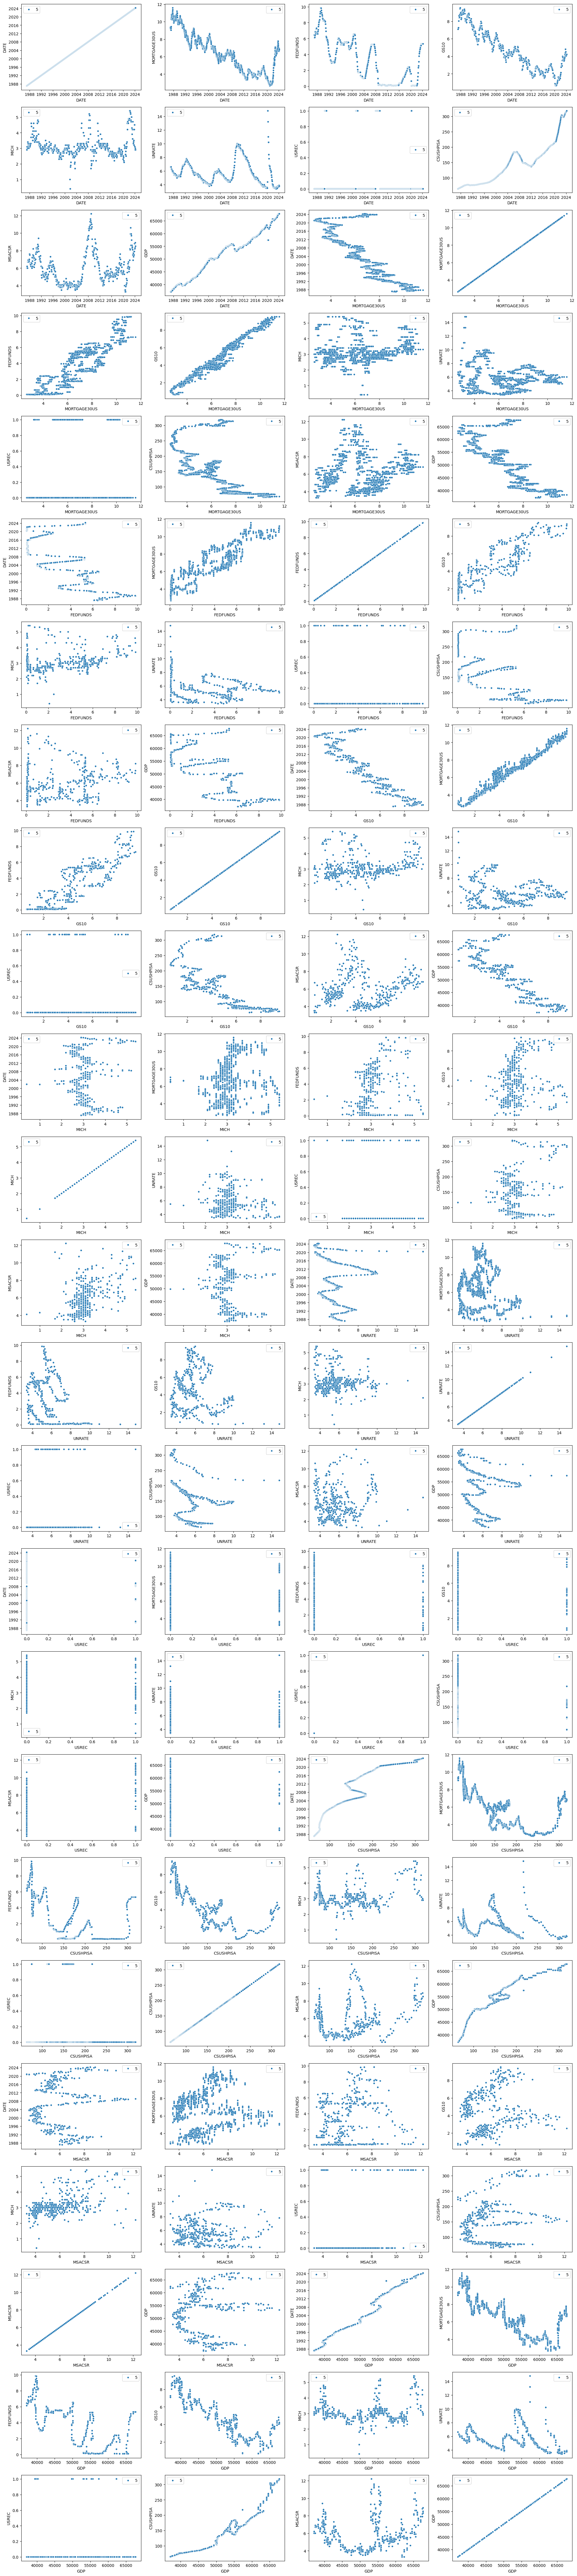

In [70]:
#scatter plot various features

columns=mortgage_df_final.columns
k=1
plt.figure(figsize=(25,300))
for i in columns:
    for j in columns:
        plt.subplot(64,4,k)
        sns.scatterplot(data=mortgage_df_final,x=i,y=j,size=5)
        k+=1
plt.savefig('../Graph/Scatter_plot_variou_features.png', dpi = 192);

### Histogram Distribution of various features

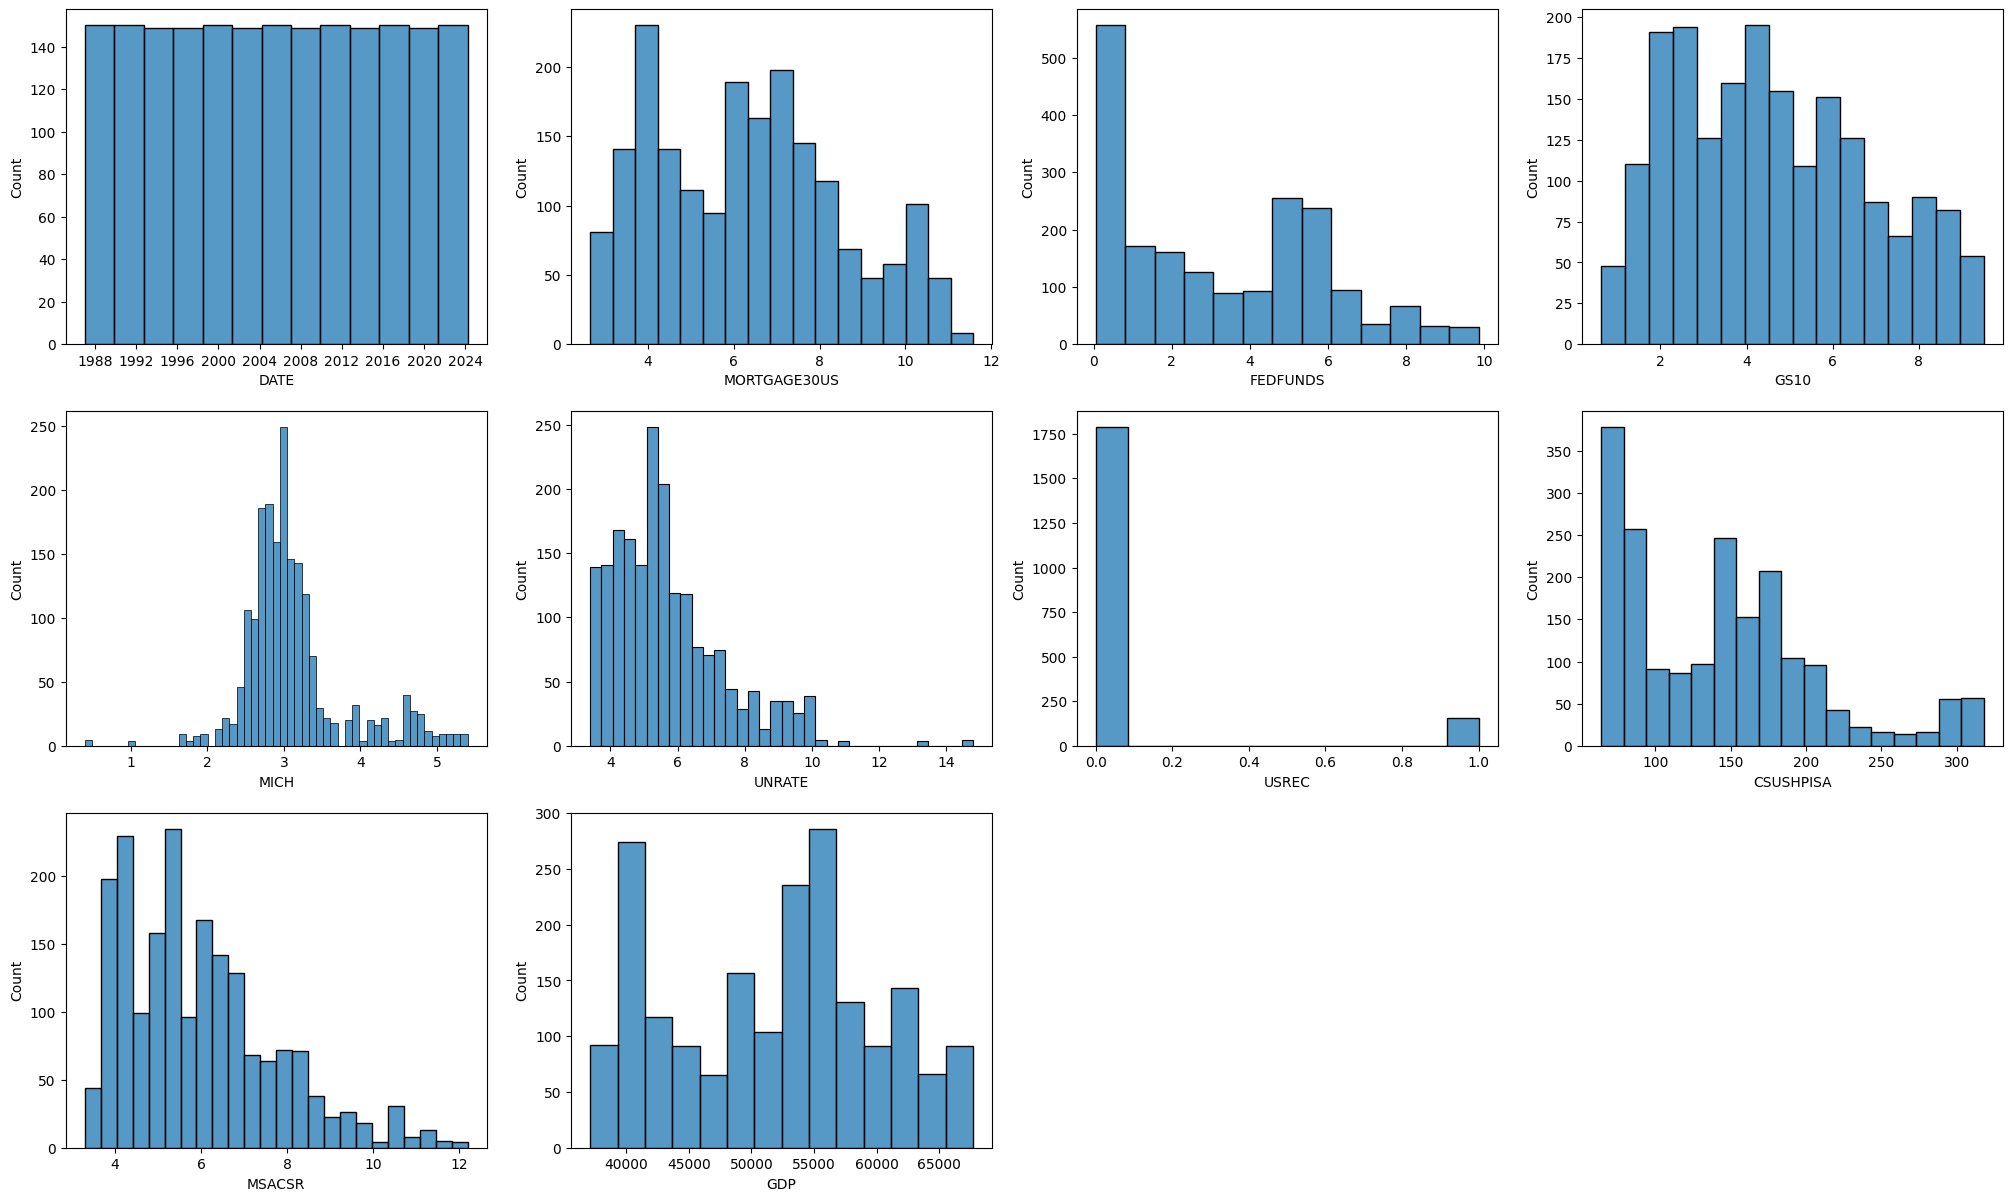

In [71]:
#HistoGram
k=1
plt.figure(figsize=(25,20))
for i in columns:
    plt.subplot(4,4,k)
    sns.histplot(mortgage_df_final[i])
    k+=1
plt.savefig('../Graph/Histogram_distribution_variou_features.png', dpi = 192);

### BoxPlot for various features

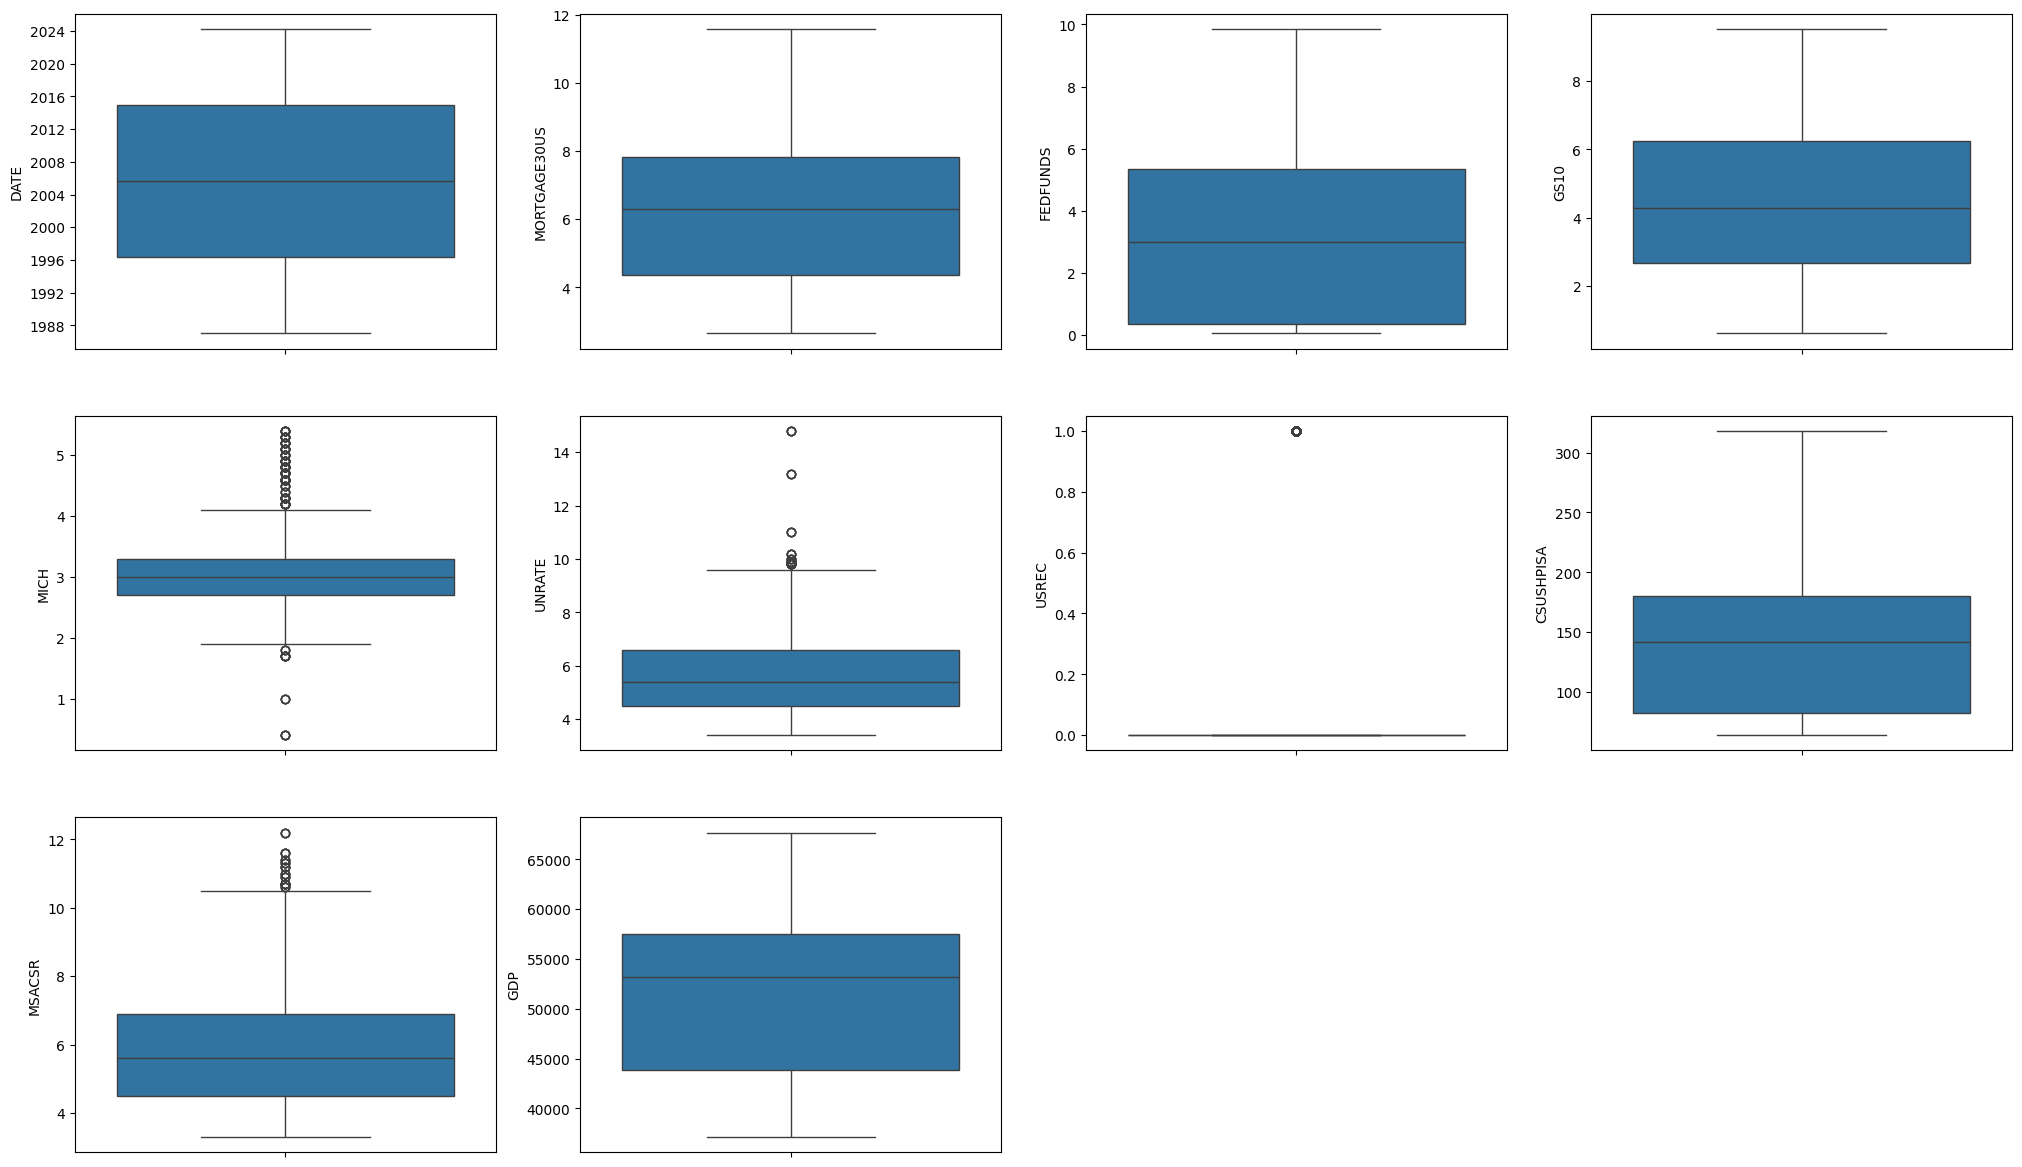

In [72]:
#box plot

k=1
plt.figure(figsize=(25,20))
for i in columns:
    plt.subplot(4,4,k)
    sns.boxplot(mortgage_df_final[i])
    k+=1
plt.savefig('../Graph/BoxPlot_variou_features.png', dpi = 192);

### From the above boxplot we see there are outliers in MSACSR(Monthly Housing affordability index), UNRATE(Unemployment Rate), MICH(University of Michigan Inflation Expectation)

 ### Correlation Heatmap

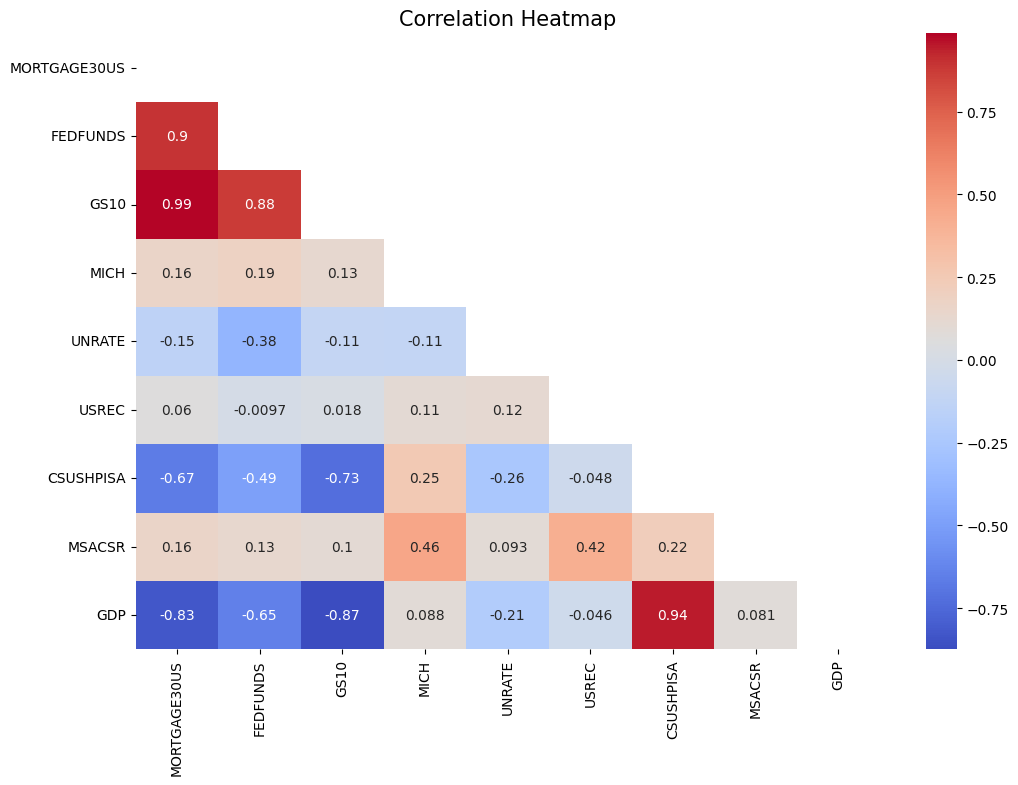

<Figure size 640x480 with 0 Axes>

In [73]:
# Correlation between different numerical variables

corr = mortgage_df_final.corr(numeric_only =True)
plt.figure(figsize=(12, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
sns.heatmap(corr
            , annot = True
            , cmap = 'coolwarm'
             , mask = mask);
plt.title('Correlation Heatmap', fontsize = 15)
#plt.xticks(rotation=30)
plt.show()
plt.savefig('../Graph/Correlation_heatmap_of_features.png', dpi = 192);

#### Above correlation heatmap shows there is very strong positive correlation between 30 year fixed MortgateRate(MORTGAGE30US) and various features like GS10 (10-Year Treasury Constant Maturity Rate) and FEDFUNDS(Federal Funds Rate). And strong negative correlation with GDP, CSUSHPISA(Case-Shiller U.S. National Home Price Index)

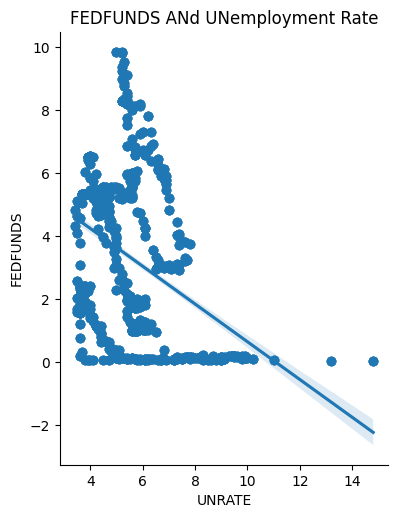

In [74]:
# Some exploratory data visualization
sns.pairplot(data=mortgage_df_final, x_vars = ['UNRATE'], y_vars = 'FEDFUNDS', height=5, aspect=0.8, kind='reg')
plt.title('FEDFUNDS ANd UNemployment Rate')
plt.savefig('../Graph/FEDFUNDS_UNemployment.png', dpi = 192);

In [3]:
### Distribution of Mortgage Rate Oover time

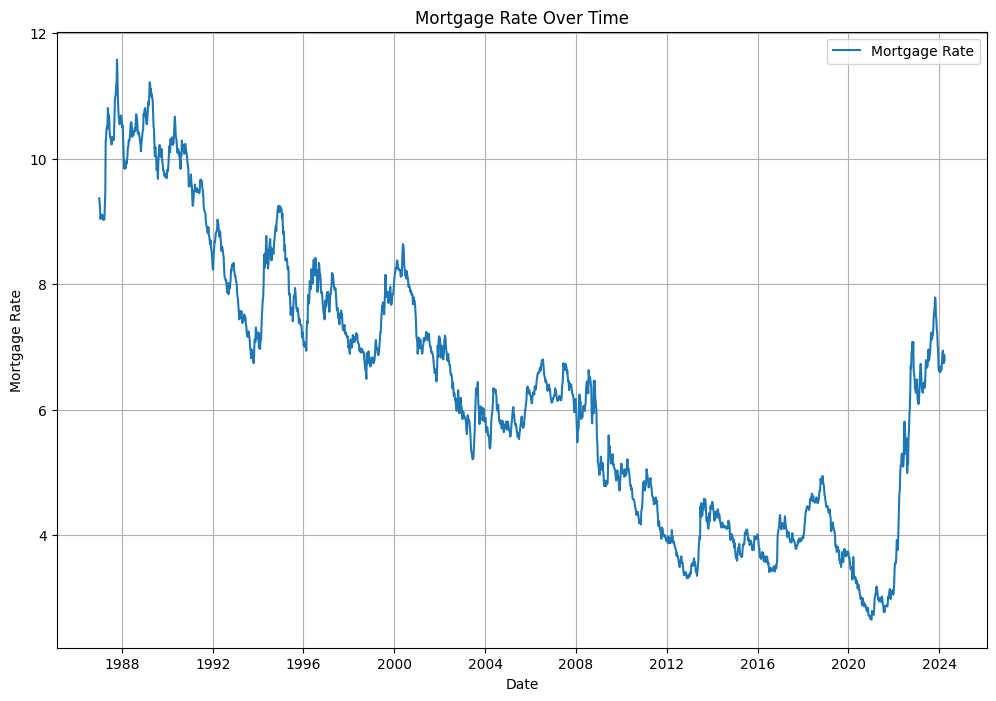

In [71]:

# plot mortgage rate over time
plt.figure(figsize=(12, 8))
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['MORTGAGE30US'], label='Mortgage Rate')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mortgage Rate', fontsize=14)
plt.title('Mortgage Rate Over Time', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('../Graph/MortgageRate_over_time.png', dpi = 192);

### Distribution of various rates over time

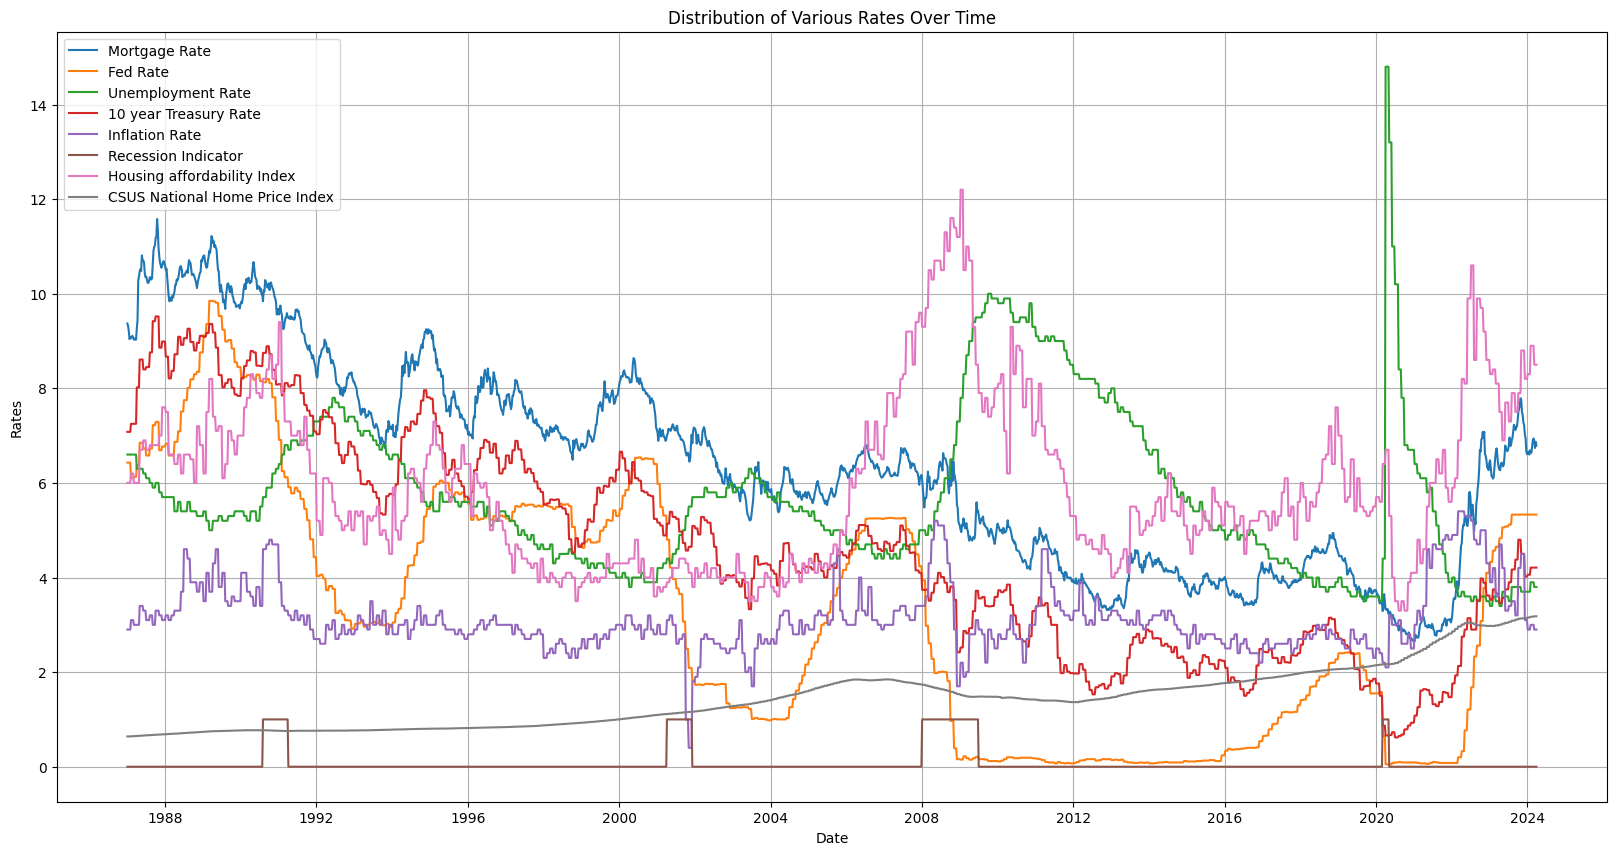

In [72]:
#Distribution of various features over time
plt.figure(figsize=(20, 10))
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['MORTGAGE30US'], label='Mortgage Rate')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['FEDFUNDS'], label='Fed Rate')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['UNRATE'], label='Unemployment Rate')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['GS10'], label='10 year Treasury Rate')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['MICH'], label='Inflation Rate')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['USREC'], label ='Recession Indicator')

plt.plot(mortgage_df_final['DATE'], mortgage_df_final['MSACSR'], label ='Housing affordability Index')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['CSUSHPISA']/100, label='CSUS National Home Price Index')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Rates', fontsize=14)
plt.title('Distribution of Various Rates Over Time', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('../Graph/Different_economic_idicators_OVer_time.png', dpi = 192);

We can see from above graph that the 30 year Mortgage Rate is not highest currently. The interest rates very high before 1988 and has decreased with ups and downs and it seems the mortgage rates were smalles after covid 19 in 2020 and then increasing gradually with slight up and down. We can also see the with least Mortgagerate there was highest unemployment so far.The housing affordability index was in peak during the after the 2008 recesson and was decreasing with ups and down since then. It was right after the Covid 19.

In [73]:
mortgage_df_final.columns

Index(['DATE', 'MORTGAGE30US', 'FEDFUNDS', 'GS10', 'MICH', 'UNRATE', 'USREC',
       'CSUSHPISA', 'MSACSR', 'GDP'],
      dtype='object')

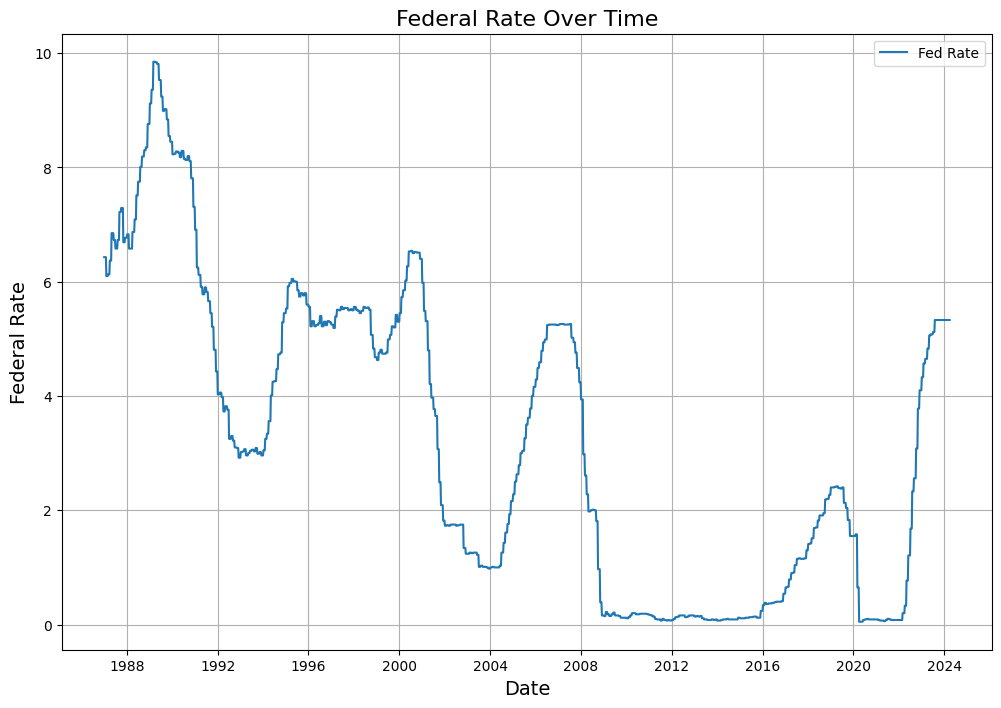

<Figure size 640x480 with 0 Axes>

In [75]:
#Federal Fund Rate Over time
plt.figure(figsize=(12, 8))
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['FEDFUNDS'], label='Fed Rate')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Federal Rate', fontsize=14)
plt.title('Federal Rate Over Time', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
plt.savefig('../Graph/Fed_InteresetRate_OVer_time.png', dpi = 192);

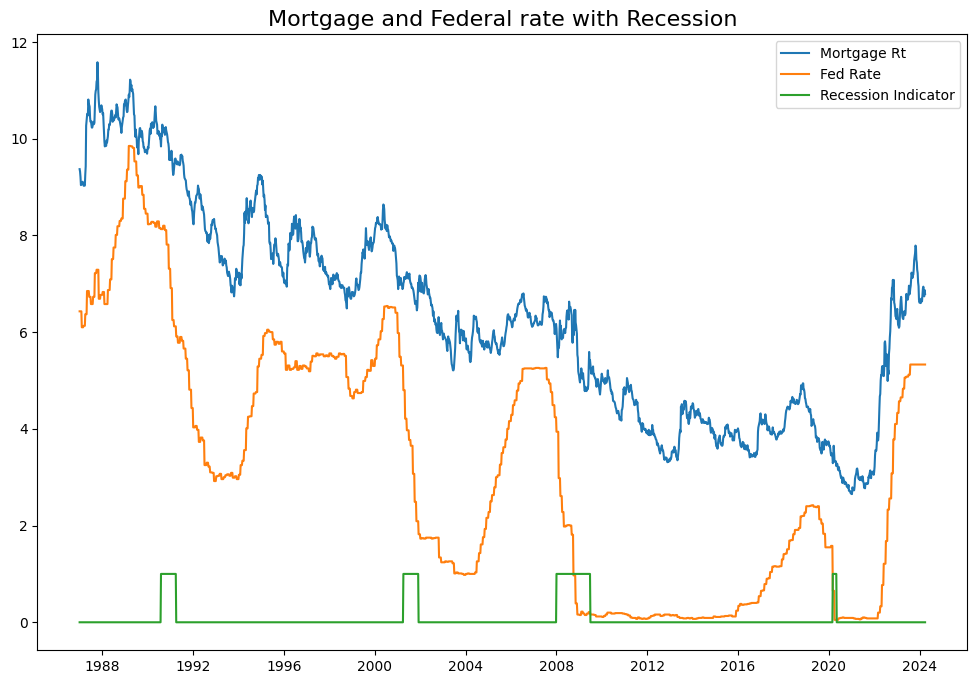

In [76]:

plt.figure(figsize =(12,8))
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['MORTGAGE30US'], label ='Mortgage Rt')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['FEDFUNDS'], label ='Fed Rate')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['USREC'], label ='Recession Indicator')
plt.title('Mortgage and Federal rate with Recession', fontsize=16)
plt.legend()
plt.savefig('../Graph/Fed_MortgaeRate_Recesssion.png', dpi = 192);

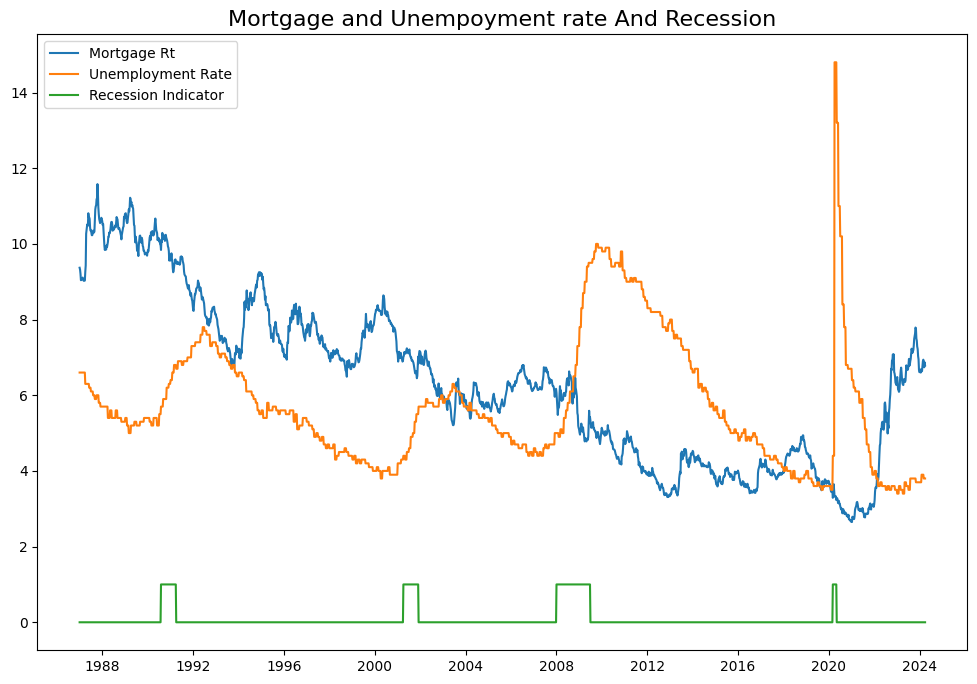

In [77]:
plt.figure(figsize =(12,8))
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['MORTGAGE30US'], label ='Mortgage Rt')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['UNRATE'], label ='Unemployment Rate')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['USREC'], label ='Recession Indicator')
plt.title('Mortgage and Unempoyment rate And Recession', fontsize=16)
plt.legend()

plt.savefig('../Graph/Unempoyment_MortgaeRate_Recesssion.png', dpi = 192);

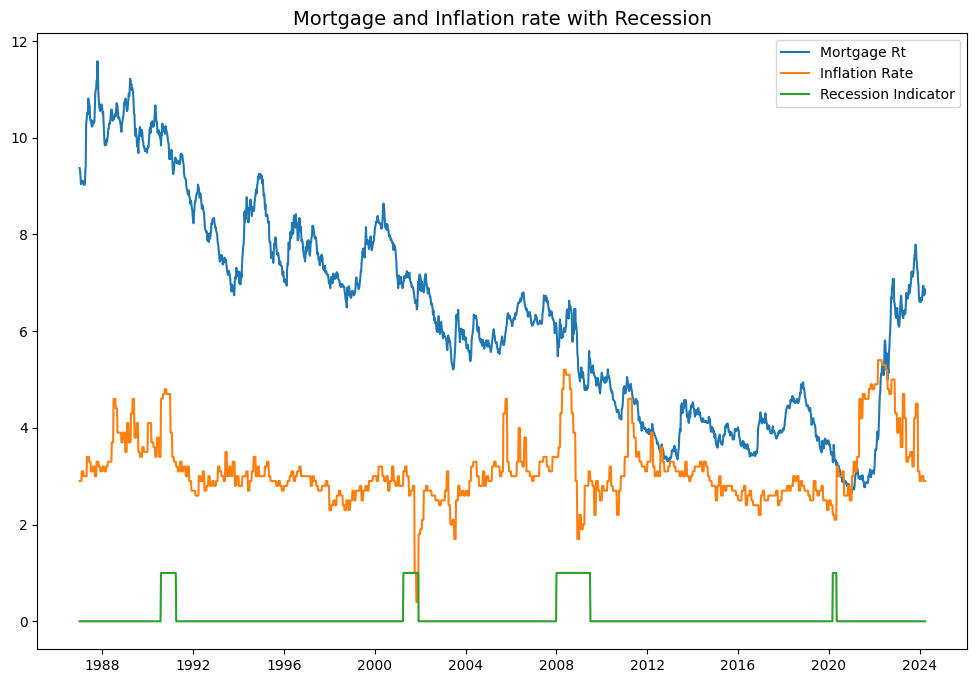

In [78]:
plt.figure(figsize =(12,8))
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['MORTGAGE30US'], label ='Mortgage Rt')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['MICH'], label ='Inflation Rate')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['USREC'], label ='Recession Indicator')
plt.title('Mortgage and Inflation rate with Recession', fontsize=14)
plt.legend()
plt.savefig('../Graph/Inflation_MortgaeRate_Recesssion.png', dpi = 192);

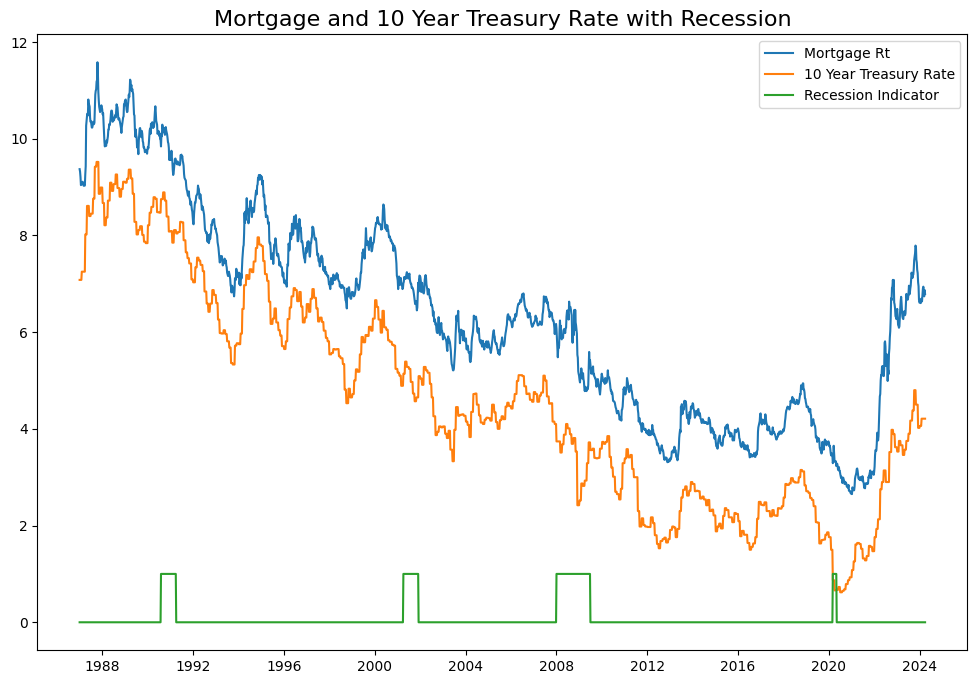

In [79]:
plt.figure(figsize =(12,8))
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['MORTGAGE30US'], label ='Mortgage Rt')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['GS10'], label ='10 Year Treasury Rate')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['USREC'], label ='Recession Indicator')
plt.title('Mortgage and 10 Year Treasury Rate with Recession', fontsize=16)
plt.legend()
plt.savefig('../Graph/1oYearTreasury_MortgaeRate_Recesssion.png', dpi = 192);

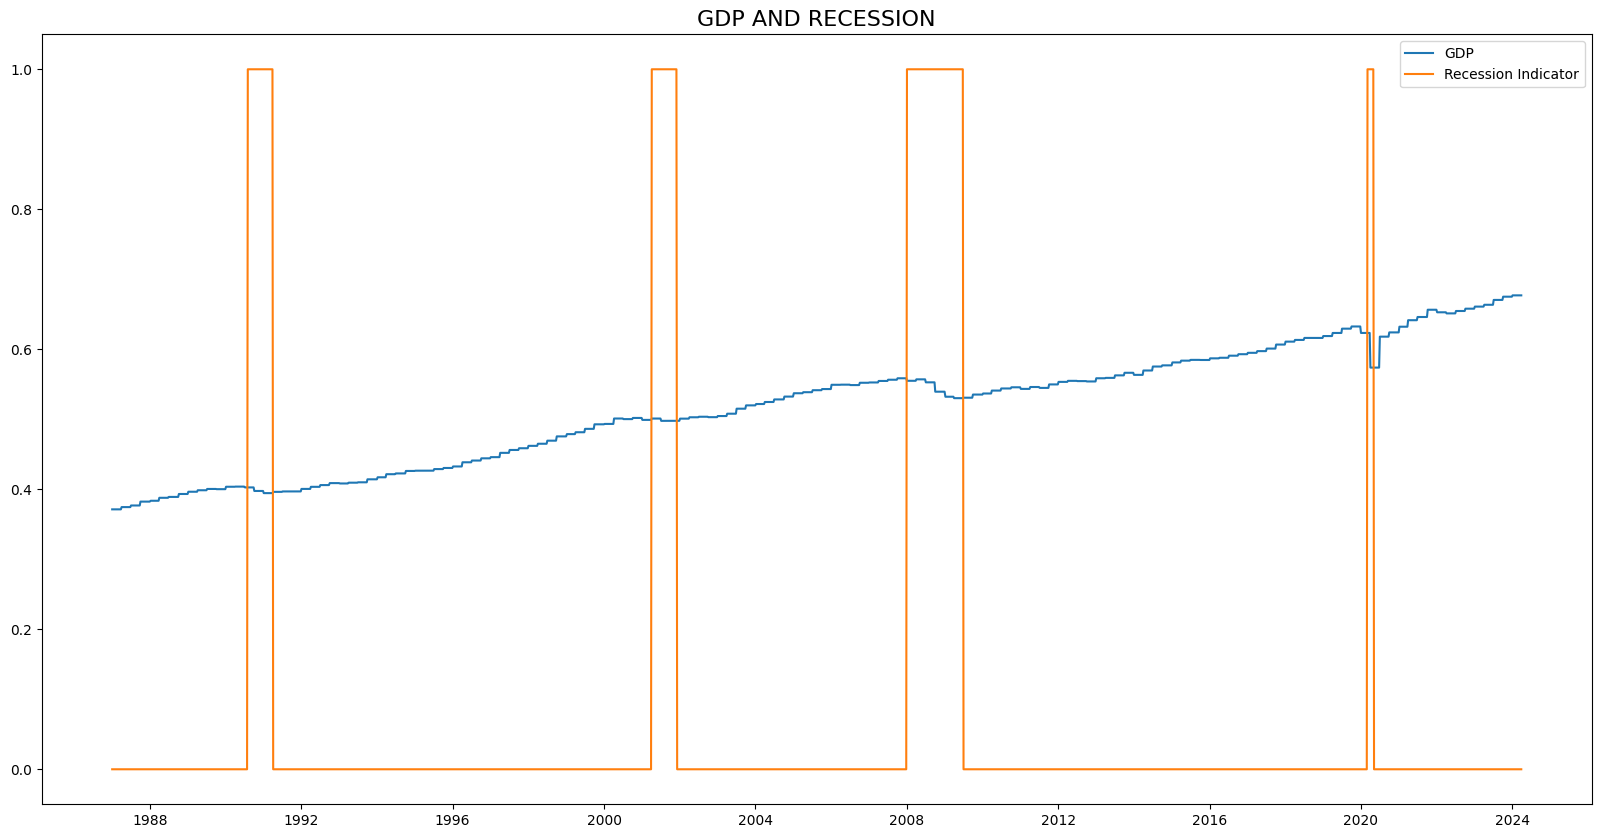

In [80]:
plt.figure(figsize =(20,10))
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['GDP']/100000, label ='GDP')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['USREC'], label ='Recession Indicator')
plt.title('GDP AND RECESSION', fontsize=16)
plt.legend()
plt.savefig('../Graph/GDP_AND_Recesssion.png', dpi = 192);

GDP decreased during recession

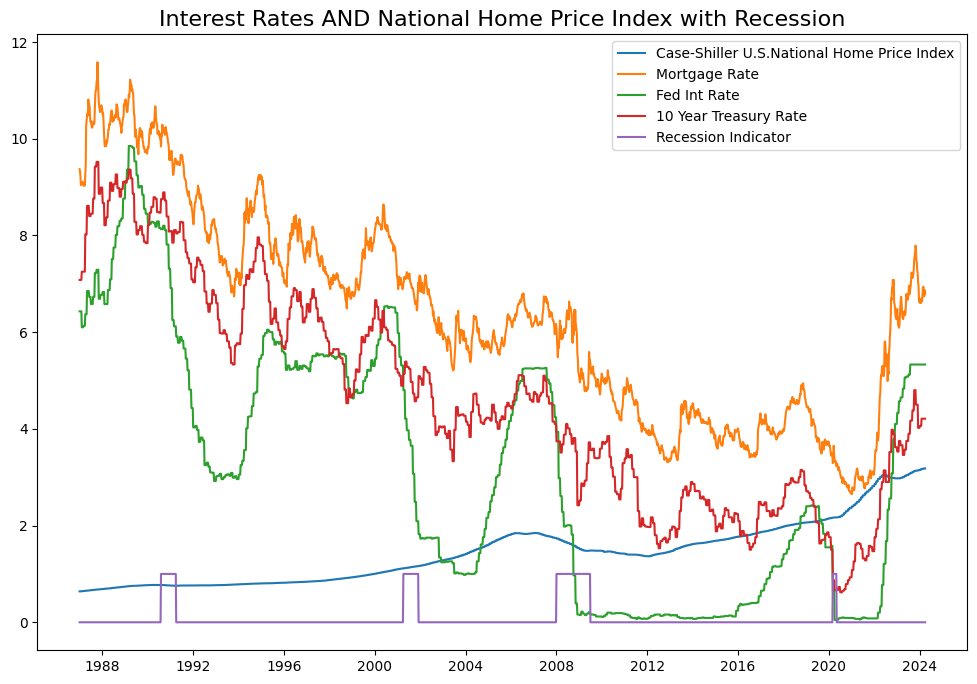

In [81]:
#Plot of recession indicator vs US NAtional home price index
plt.figure(figsize =(12,8))
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['CSUSHPISA']/100, label ='Case-Shiller U.S.National Home Price Index')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['MORTGAGE30US'], label ='Mortgage Rate')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['FEDFUNDS'], label ='Fed Int Rate')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['GS10'], label ='10 Year Treasury Rate')
plt.plot(mortgage_df_final['DATE'], mortgage_df_final['USREC'], label ='Recession Indicator')
plt.title('Interest Rates AND National Home Price Index with Recession', fontsize=16)
plt.legend()
plt.savefig('../Graph/National_HomePriceIndex_interestRates_recession.png', dpi = 192);

### Home price decreased drastically during 2008 recession

In [82]:
mortgage_df_final.columns

Index(['DATE', 'MORTGAGE30US', 'FEDFUNDS', 'GS10', 'MICH', 'UNRATE', 'USREC',
       'CSUSHPISA', 'MSACSR', 'GDP'],
      dtype='object')

In [83]:
mortgage_df_final.isnull().sum()

DATE            0
MORTGAGE30US    0
FEDFUNDS        0
GS10            0
MICH            0
UNRATE          0
USREC           0
CSUSHPISA       0
MSACSR          0
GDP             0
dtype: int64

### The final data frame is saved as a CSV file for further analysis and model creation

In [84]:
# save the data frame in csv format

mortgage_df_final.to_csv('../Data/fred_mortg_data_clean.csv', index=False)